In [2]:
import pandas as pd 

In [3]:
raw_data = pd.read_csv(r'C:\Users\Malek\Documents\DataScientist\model linieare\datasets\TP_11_prostate_dataset.txt', delimiter ='\t')

raw_data.head()

In [4]:
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


# Les colonnes qui nous intéresse sont :
les colonnes qui sint des indiquateurs de l'état du passion 
1.lcavol
2.lweight
3.age 
4.bph
5.svi
6.lcp
7.gleason
8.pgg45

# Traget :
lpsa

In [5]:
X = raw_data.iloc[:,1:-2]
X.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0


In [6]:
y = raw_data.iloc[:,-2]
y.head()

0   -0.430783
1   -0.162519
2   -0.162519
3   -0.162519
4    0.371564
Name: lpsa, dtype: float64

In [7]:
#Stadardiser les données 
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scale = std_scale.transform(X)

C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Malek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale , y , test_size = 0.25)

# Simple regression Linear 

In [9]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# Performance du modele
import numpy as np 
baseline_error = np.mean((lr.predict(X_test) - y_test)**2) 
print(baseline_error)

0.47782310359824515


# Regressoin Ridge

In [11]:
ridge = linear_model.Ridge()
# Pour le ridge on doit tester plusieur parametre Alpha qui qui permet de rédulariser le modele 
n_alphas = 50 
#les aplha seront sur un echelle log
alphas = np.logspace(-5 ,5 , n_alphas )
coefs = []
errors = [] 
for a in alphas: 
    ridge.set_params(alpha=a)
    ridge.fit(X_train , y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X_test) - y_test) ** 2) )

# Afficher les =!= parametres et leurs errors pour comparer 

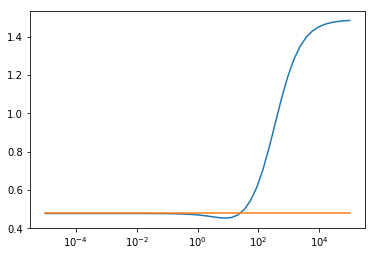

In [14]:
import matplotlib.pyplot as plt 
ax = plt.gca()
ax.plot(alphas , errors , [10**-5 , 10**5], [baseline_error , baseline_error]) 
ax.set_xscale('log')
plt.show()

In [15]:
# Recuperer la valeur de alpha pour une error minimale 
np.argmin(errors)

29

In [16]:
#Valeur de l'error
errors[np.argmin(errors)]

0.4536547856984998

In [17]:
alphas[0]

1e-05

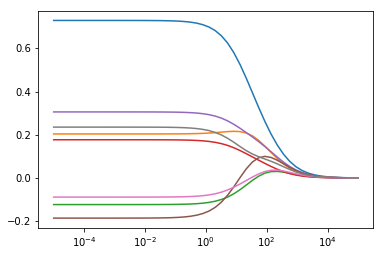

In [18]:
#chemin de regularisation 
ax = plt.gca()
ax.plot(alphas , coefs ) 
ax.set_xscale('log')
plt.show()

 # Regressoin Ridge

In [19]:
lasso = linear_model.Lasso()
# Pour le ridge on doit tester plusieur parametre Alpha qui qui permet de rédulariser le modele 
n_alphas = 50 
#les aplha seront sur un echelle log
alphas = np.logspace(-5 ,5 , n_alphas )
coefs = []
errors = [] 
for a in alphas: 
    lasso.set_params(alpha=a)
    lasso.fit(X_train , y_train)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_test) - y_test) ** 2) )

# Afficher les =!= parametres et leurs errors pour comparer 

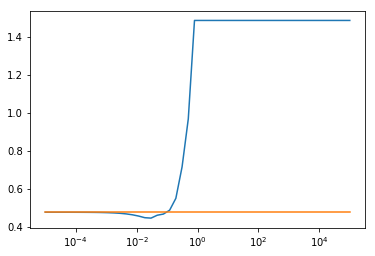

In [20]:
ax = plt.gca()
ax.plot(alphas , errors , [10**-5 , 10**5], [baseline_error , baseline_error]) 
ax.set_xscale('log')
plt.show()

In [21]:
# Recuperer la valeur de alpha pour une error minimale 
np.argmin(errors)

17

In [22]:
#Valeur de l'error
errors[np.argmin(errors)]

0.44679918431429877

In [23]:
alphas[0]

1e-05

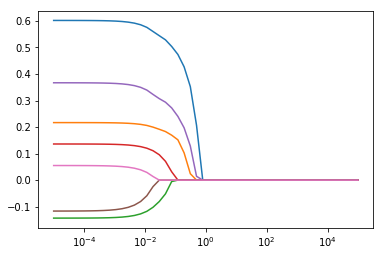

In [79]:
#chemin de regularisation 
ax = plt.gca()
ax.plot(alphas , coefs ) 
ax.set_xscale('log')
plt.show()